# Linear Algebra

## Motivation 

Linear algebra and matrices are a fundamental aspect of data science models and problems, including image processing, deep learning, natural language processing, recommender systems, and dimensionality reduction techniques like principal components analysis, which we will cover later. 

You will encounter matrices many times in your career as a data scientist! 

Linear algebra is the basis for many machine learning models. 

Data is usually already set up into matrix form by default! 

<img src= "images/dataset.jpeg">

We'll see linear algebra can be used to model complicated things like language: 

<img src = "images/Word-Vectors.png">

Linear algebra is important for image compression and recognition

<img src = "images/images.gif">

Recommendation engines are able to make much more sophisticated recommendations by using linear algebra in conjunction with user and content data.

<img src = "images/netflix.png">

## Problem: 

Let's start our inquiry into linear algebra with a simpler problem. 

You are working on an image preprocessing problem with a colleague and have determined that the secret to preprocessing some image for machine learning is to solve a system of equations: 

\begin{equation}
\begin{bmatrix}
2 & -1 & 4 & 6 & 3 \\
4 & 7 & 1 & 1 & 12 \\
9 & 14 & 2 & 2 & 6 \\
1 & 1 & 1 & 2 & 17 \\
-3 & -2 & -6 & 12 & -5
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{bmatrix}
=
\begin{bmatrix}
3 \\
15 \\
20 \\
2 \\
-6
\end{bmatrix}
\end{equation}

How can you solve this system quickly?

In this lesson, we'll show you how! 

> Use Numpy to solve systems of linear equations! 

## Let's discuss how to solve simpler systems of linear equations 


Consider a two-variable system of linear equations

$$2x + 4y = 10 \\
x + 4y = 7$$

We can solve this using plain old algebra to find that x = 3 and y = 1.

But how do we solve this using NumPy?

Note to instructors: 

### Solution through Substitution
We _could_ solve this system by taking the first equation, solving it for X, and then plugging the result into the second:

$2x + 4y = 10$. <br/> Thus: $\\ 2x = 10 - 4y \\ x = 5 - 2y$.

Plugging in to the second equation, we have:

$5 - 2y + 4y = 7$. <br/> Thus: $\\ 5 + 2y = 7 \\ 2y = 2 \\ y = 1$.

Plugging this back into the first equation, we have:

$2x + 4 = 10$.  <br/> Thus: $\\ 2x = 6 \\ x = 3$.

And we have our solutions:  $x = 3, y = 1$.

But this is computationally _very slow_! There is a better way:

### Solution through Elimination

Much faster is to subtract the second equation from the first:

If $2x + 4y = 10$ and $x + 4y = 7$,
then $(2x - x) + (4y - 4y) = 10 - 7$, i.e. $x = 3$. Then I could subtract this ($x + 0y = 3$) from $x + 4y = 7$, yielding: $4y = 4$, i.e. $y = 1$.

Before we can show you how to solve systems of linear equations using NumPy, we need to discuss vectors, matrices, and vector and matrix operations. 

# From scalars to vectors 

A _scalar_ has a single value. Any real number can be the value of a scalar. 

A _vector_ is specified by two parameters: magnitude and direction. 
* In a two dimensional cartesian coordinate system, a vector $\vec{v}$ (also denoted by $\mathbf{v}$) will be specified by its x- and y-components, $v_x$ and $v_y$. 
    * The magnitude $v$ is given by $||v|| = \sqrt{v^2_x + v^2_y}$
    * The direction of $v$ is given by $\theta = tan^{-1}\left(\frac{v_y}{v_x}\right)$

# Vector arithmetic 

## Vector Addition

Vector addition is simple: Just add the components together. 

Say we have two two-dimensional vectors $\mathbf{v_1}$ and $\mathbf{v_2}$, where $\mathbf{v_1} = \begin{bmatrix}
8 \\
14
\end{bmatrix}$ and $\mathbf{v_2} = \begin{bmatrix}
7 \\
6
\end{bmatrix}$. 

The sum of the two vectors, $\mathbf{v}$, is equal to: 
$$\mathbf{v} = \mathbf{v_1} + \mathbf{v_2} = \begin{bmatrix}
15 \\
20
\end{bmatrix} $$

How do we code this? 

In [1]:
# Try this 

v_1 = [8, 14]
v_2 = [7, 6]

v_1 + v_2

[8, 14, 7, 6]

This doesn't work!   


Base Python is not good for non-scalar arithmetic. This is one of the many places where NumPy can come in very handy! 

In [2]:
# Let's try this again, using NumPy arrays 

import numpy as np 

v_1 = np.array([8, 14])
v_2 = np.array([7, 6])

v_1 + v_2

array([15, 20])

Notice we defined our vector as a numpy array. We passed in a list of values to create our vectors. 

> To represent a two-dimensional vector, we pass in a two-element list. If we wanted to represent a higher n-dimensional vector, we would pass in an n-element list to np.array. 

## Vector Multiplication

Is base Python any better for vector _multiplication_ ? 

In [3]:
# Try multiplying the vectors (4, 14) and (8, 6)

v_1 = (4, 14)
v_2 = (8, 6)

v_1*v_2

TypeError: can't multiply sequence by non-int of type 'tuple'

Not really! 

There are multiple ways of understanding the notion of vector multiplication: 
* you can take the _dot product_ of two vectors to return a scalar
* you can take the _cross product_ of two vectors to return a new vector

The one we'll use the most is the _dot product_ of two vectors, which is defined as follows: 

> The dot product is the sum of the pairwise products of the vector's entries. 

Thus, for $\mathbf{v_1} = \begin{bmatrix}
8 \\
14
\end{bmatrix}$ and $\mathbf{v_2} = \begin{bmatrix}
7 \\
6
\end{bmatrix}$,  $\mathbf{v_1} \cdot \mathbf{v_2} = 8(7) + 14(6) = 56 + 84 = 140 $ 

The dot product of two vectors is only defined when the two vectors have the same number of dimensions or elements

Let's compute the dot product of two vectors with NumPy! 

In [4]:
# Define the vectors as arrays using numpy 
v_1 = np.array([8, 14])
v_2 = np.array([7, 6])

Use the `.dot()` method of a numpy array to calculate the dot product of our two vectors: 

In [5]:
# your code here 

In [6]:
v_1.dot(v_2)

140

# Higher dimensions: from vectors to matrices 

For higher dimensions we can use _matrices_. 

Suppose we have a two-dimensional system of linear equations. 

Let's reuse our previous example: 

$$2x + 4y = 10 \\
x + 4y = 7$$

We can write this as: 

$$A\mathbf{x} = \mathbf{b}$$ 

where 

$$A = \begin{bmatrix}
2 & 4 \\
1 & 4 
\end{bmatrix},$$

$$\mathbf{x} = \begin{bmatrix}
x \\
y
\end{bmatrix},$$ 

and 

$$\mathbf{b} = \begin{bmatrix}
10 \\
7
\end{bmatrix}$$

Here, $A$ is the **matrix** of linear coefficients that relate the input variables $\mathbf{x}$ (a vector of inputs) to the output variables $\mathbf{b}$ (a vector of outputs). 

We'll look into how to solve systems of linear equations using numpy later in this lesson. First, we need to look at how to define matrices in NumPy! 



## How do you define a matrix in NumPy? 

To define a matrix using NumPy, you need to pass a list of lists to `np.array`. 

Imagine we wanted to define the matrix $A = \begin{bmatrix}
2 & 4 \\
1 & 4 
\end{bmatrix}$ 

To define the matrix $A$ using NumPy, run the following code: 

```python
# Define the matrix A using np.array
A = np.array([[2, 4], [1, 4]])
print(A)
```

In [7]:
# Define the matrix A using np.array
A = np.array([[2, 4], [1, 4]])
print(A)

[[2 4]
 [1 4]]


If you want to define a $3\times2$ dimensional matrix $B = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}$  , you  need to pass a list of 3 lists with 2 elements to `np.array`. 

Define B as a numpy array in the code cell below. We already give you a list of lists, `B_list`, to pass to `np.array`.

In [8]:
B_list = [[1, 2], [3, 4], [5, 6]]
# your code here 
B = None 
print(B)

None


In [9]:
B = [[1, 2], [3, 4], [5, 6]]
B = np.array(B)
print(B)

[[1 2]
 [3 4]
 [5 6]]


How do we verify this is a $3\times 2$ matrix? 

In [10]:
print(B.shape)

(3, 2)


## The transpose of a matrix

Taking the transpose of a matrix will flip the rows and columns of a matrix. 

You'll find this an important step when performing operations with arrays in numpy. 

Compute $B^T$, the transpose of $B$, using `np.transpose()`, print it, and print its shape. 

In [11]:
B_transpose = np.transpose(B)
print(B_transpose)
print("The shape of this matrix is {}.".format(B_transpose.shape))

[[1 3 5]
 [2 4 6]]
The shape of this matrix is (2, 3).


## Matrix Multiplication 

Just as there are different notions of multiplication for vectors, there are also different notions of multiplications for matrices. Two different types of matrix multiplication are:

* the Hadamard product, where multiplication proceeds element-wise, like matrix addition

* the dot product

### The dot product of two matrices 
Often, when people talk about multiplying matrices, they are talking about the dot product. From now on, when we talk about multiplying two matrices together, we'll be talking about taking the dot product of the two matrices. 

The dot product of two matrices can be calculated as follows: 

\begin{equation}
\begin{bmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2}
\end{bmatrix}
\times
\begin{bmatrix}
b_{1,1} & b_{1,2} \\
b_{2,1} & b_{2,2}
\end{bmatrix}
=
\begin{bmatrix}
a_{1,1}\times b_{1,1} + a_{1,2}\times b_{2,1} & a_{1,1}\times b_{1,2} + a_{1,2}\times b_{2,2} \\
a_{2,1}\times b_{1,1} + a_{2,2}\times b_{2,1} & a_{2,1}\times b_{1,2} + a_{2,2}\times b_{2,2}
\end{bmatrix}
\end{equation}

* Take the entries in each _row_ of the left matrix and multiply them, respectively, by the entries in each _column_ of the right matrix, and then add them up. 

* This is like the dot product we calculated above for our two vectors! 

**To be able to perform the dot product of two matrices $A$ and $B$, $AB$, the number of columns of A must be equal to the number of rows of B.** 

The number of rows of the product matrix, $AB$, will equal the number of rows of $A$ and the number of columns will equal the number of columns of $B$.

Also, note that matrix dot-multiplication is NOT commutative! In general, $AB \neq BA$.




Let's practice matrix multiplication using NumPy! 

Let's compute the dot product of the previously defined matrices A and B using NumPy. 

To compute the dot product of two matrices A and B we use the same `.dot()` notation as before for matrix multiplication. (Using `A * B` will compute the element-wise Hadamard product). 

Can we compute $AB$? Why? 

In [12]:
A.dot(B) 

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

> No, we cannot. The number of columns of A is not equal to the number of rows of B. 

Compute $BA$ using NumPy. 

In [13]:
B.dot(A)

array([[ 4, 12],
       [10, 28],
       [16, 44]])

> We can compute $BA$ because the number of columns of B is equal to the number of rows of A. 

What is $B^T B$ equal to? What are some of the properties of the resulting matrix? 

In [14]:
B_transpose.dot(B)

array([[35, 44],
       [44, 56]])

$B^T B$ is a square diagonal matrix. 

## The inverse of a matrix

Matrix division is not defined. We cannot divide one matrix by another.

The inverse of $A$, denoted by $A^{-1}$, is only defined if A is a square matrix, where the number of rows and columns of A is the same. 

When a matrix $A$ is multiplied by its inverse $A^{-1}$, $A^{-1} A$, we obtain an identity matrix $I$ of the same dimension as $A$, which contains 1's along the main diagonal of the matrix and 0's everywhere 
else. 

We use `np.linalg.inv(A)` to compute the inverse of a square matrix $A$ using NumPy.

Compute the inverse of $A = \begin{bmatrix}
2 & 4 \\
1 & 4 
\end{bmatrix}$  using NumPy and print it. Check that $A A^{-1}$ is equal to the identity matrix. 

In [15]:
A = np.array([[2, 4], [1, 4]])

A_inv = np.linalg.inv(A)

print(A_inv)

[[ 1.   -1.  ]
 [-0.25  0.5 ]]


In [16]:
print(A.dot(A_inv))

[[1. 0.]
 [0. 1.]]


## How do we solve a system of linear equations using NumPy? 

Let's go back to the example of a two-dimensional system of linear equations. 

$$2x + 4y = 10 \\
x + 4y = 7$$

We saw that can write this as: 

$$A\mathbf{x} = \mathbf{b}$$ 

where 

$$A = \begin{bmatrix}
2 & 4 \\
1 & 4 
\end{bmatrix},$$

$$\mathbf{x} = \begin{bmatrix}
x \\
y
\end{bmatrix},$$ 

and 

$$\mathbf{b} = \begin{bmatrix}
10 \\
7
\end{bmatrix}$$

To solve for $\mathbf{x}$, we cannot divide $\mathbf{b}$ by A! 

To solve for $\mathbf{x}$, we need to multiply both sides of the equation $A\mathbf{x} = \mathbf{b}$ by the **inverse matrix** of $A$:  

$$\mathbf{x} = A^{-1}\mathbf{b}$$

Solve for $\mathbf{x}$. 

In [17]:
A = np.array([[2, 4], [1, 4]])
b = np.array([10, 7])
A_inv = np.linalg.inv(A)

x = A_inv.dot(b)
print(x)

[3. 1.]


In [18]:
# This also works
np.linalg.solve(A, b)

array([3., 1.])

Now that we know how to solve systems of linear equations using NumPy, let's go back to our starting problem. 

Use NumPy to solve this system of equations: 

\begin{equation}
\begin{bmatrix}
2 & -1 & 4 & 6 & 3 \\
4 & 7 & 1 & 1 & 12 \\
9 & 14 & 2 & 2 & 6 \\
1 & 1 & 1 & 2 & 17 \\
-3 & -2 & -6 & 12 & -5
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{bmatrix}
=
\begin{bmatrix}
3 \\
15 \\
20 \\
2 \\
-6
\end{bmatrix}
\end{equation}

In [19]:
A = np.array([[2, -1, 4, 6, 3], 
              [4, 7, 1, 1, 12], 
              [9, 14, 2, 2, 6], 
              [1, 1, 1, 2, 17], 
              [-3, -2, -6, 12, -5]
             ])
b = np.array([3, 15, 20, 2, -6])

In [20]:
A_inv = np.linalg.inv(A)
x = A_inv.dot(b)
x

array([-14.51240389,   9.46394893,   8.31031481,   1.49992746,
        -0.2506891 ])

In [21]:
# This also works
x = np.linalg.solve(A,b)
x

array([-14.51240389,   9.46394893,   8.31031481,   1.49992746,
        -0.2506891 ])

# Ordinary Least Squares using NumPy 

Let's look at a toy example. 

We have the following data:

```python
x = [1, 2, 3, 4]
y = [7, 4, 3, 2]
```

Here, x is the number of cups of coffee Joe drank during three consecutive days, and y is the number of hours he slept each of those nights.  

We want to fit a line to this data to describe the relationship between the number of cups of coffee Joe drank in a day and the hours he was able to sleep each night with a linear model. 

This line will be of the form $y = mx + b$, where y is the number of hours of sleep per night, x is the number of cups of coffee drank in the day, m is the slope of the line, and b the y-intercept of the line. 

Using this, we can write: 

$$ b + m*1 = 7 \\
b + m*2 = 4 \\
b + m*3 = 3 \\
b + m*4 = 2$$

This is a system of linear equations that can be written in matrix form as follows: 

$$
    \left[ {\begin{array}{cc}
   1 & 1 \\
   1 & 2 \\
   1 & 3 \\
   1 & 4
  \end{array} } \right]
   \left[ {\begin{array}{c}
   b \\
   m \\
  \end{array} } \right] =
    \left[ {\begin{array}{c}
    7 \\
    4 \\
    3 \\
    2
  \end{array} } \right] 
$$

We are hoping that there is some _linear combination_ of the columns of the first matrix that will give us our vector of observed values $y$. 

Before we proceed, let's visualize our data using a scatter plot:

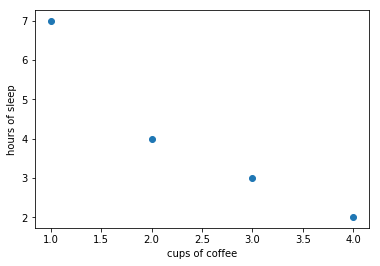

In [28]:
import matplotlib.pyplot as plt 
%matplotlib inline 

x = [1, 2, 3, 4]
y = [7, 4, 3, 2]

plt.scatter(x, y)
plt.xlabel('cups of coffee')
plt.ylabel('hours of sleep');

We can see our points do not lie on a line. A linear model won't fit our data perfectly. 

> Every line we attempt to draw through these points will have some error associated with it.


## Ordinary Least Squares

Ordinary least squares tells us that our linear regression equation can be represented as the sum of a linear term and an error term: 

$$y = X\beta + error$$

To solve for the best estimate of $\beta$, we are going to assume that on average, the error is equal to 0, thus:  

$$ y = X \beta $$

In our toy example, 

$$X = \begin{bmatrix}
1 & 1 \\
1 & 2 \\ 
1 & 3 \\
1 & 4 
\end{bmatrix},$$ 

$$\beta = \begin{bmatrix}
b \\
m
\end{bmatrix},
$$

and 

$$y = \begin{bmatrix}
7 \\
4 \\ 
3 \\
2
\end{bmatrix}.$$

$\beta$ is a vector comprised of the intercept $b$ for the line and the slope $m$ for the line. 

Why does the matrix $X$ include a column of ones? 

> We need a column of ones for the intercept $b$. If we don't include an intercept term in our linear model, we would be constraining our lines to pass through the origin, which limits the types of relationships the model we're fitting can describe. 

Can you compute the inverse of $X$? 

> No, because it is not a square matrix. 

To solve for $\beta$, we need to make $X$ into a square matrix by multiplying both sides of the equation from the left by $X^T$ : 

$$X^T y = X^T X \beta $$


Now we have a square matrix that with any luck has an inverse, which we will call $(X^T X)^{-1}$. 

Multiply both sides from the left by this inverse, and we have

$$(X^T X)^{-1} X^T y =(X^T X)^{-1} X^T X\beta $$

It turns out that a matrix multiplied by its inverse is the identity matrix $(X^{-1} X)= I$:

$$(X^T X)^{-1} X^T y =I \beta $$


You know that $I\beta= \beta$. 

So, if you want to solve for $\beta$ (that is, remember, equivalent to finding the values $m$ and $b$ in this case), you find that:

$$ \beta = (X^T X)^{-1} X^T y $$

Find $\beta$ using Ordinary Least Squares.

In [34]:
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])
y = np.array([7, 4, 3, 2]) 

Xt = np.transpose(X)
XtX = Xt.dot(X)
XtX_inv = np.linalg.inv(XtX)
Xty = Xt.dot(y)

b = XtX_inv.dot(Xty)
print(b) 

[ 8.  -1.6]


Plot the best line obtained via Ordinary Least Squares against the original data. 

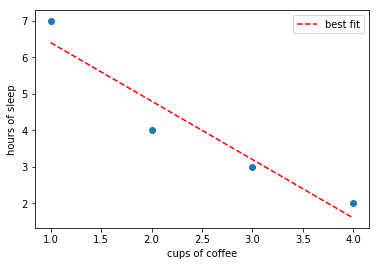

In [36]:
import matplotlib.pyplot as plt 
%matplotlib inline 

x = [1, 2, 3, 4]
y = [7, 4, 3, 2]

plt.scatter(x, y)
plt.plot(x, b[0] + b[1]*np.array(x), ls='dashed', color='r', label='best fit')
plt.xlabel('cups of coffee')
plt.ylabel('hours of sleep')
plt.legend();